# Homework 6: Problems

### ASTR-324, Spring 2018, Ivezic & Juric, University of Washington
https://github.com/uw-astr-324-s18/astr-324-s18/Astr324-S18-HW6.ipynb


## Problem 1: Principal Component Analysis

PCA applied to 4-D data for variable stars from the SDSS and LINEAR surveys:

-- SDSS u-g and g-i colors, 

-- LINEAR variability period (logP) and variability amplitude (A).

Read the data (see below), run PCA (with four components), and then

a) to get familar with the dataset, plot g-i vs. u-g and A vs. logP diagrams

b) plot P2 vs. P1 diagram, and P3 vs. P1 diagram, and P3 vs. P4 diagram. 
Comment what insights, if any, did PCA analysis bring. 

c) plot P1 vs. g-i and P1 vs. logP diagrams; repeat with P2, P3, and P4.
Comment what insights, if any, did PCA analysis bring. 


## Problem 2: Regression and age-color relation for asteroids

We will use age and color data for asteroid families shown in figure 1 from the paper "An age–colour relationship for main-belt S-complex asteroids" by Jedicke et al. (2004, Nature 429, 275), see http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf

Given these y(x) data (see below), with errors in both x and y, 
adapt the code introduced in 
[the last lecture](https://github.com/uw-astr-324-s17/astr-324-s17/blob/master/notebooks/Week-8-Thu.ipynb) 
by modifying the parabola (y(x) = a + b*x + c*x^2) fitter to fit instead
the following function

$$ y(x) = a + b*\left[1-exp\left(-(x/c)^d\right)\right].  $$

Important: here x is time, not log(time)! But when you plot, use log(time)
for x axis (see data below).

a) What are the the best-fit values and standard errors for 
parameters a, b, c and d? 

b) Show the marginal distributions of fitted parameters (hint: use plot_mcmc)

c) compare your best fit to the best fit from Jedicke et al. and comment

d) set all age errors to 1000 years (i.e. to 0.001 in Myr): 
do you get a different best fit? 

<br>
# Homework 1: Solutions

### Some useful definitions and functions

In [40]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_LINEAR_geneva
%matplotlib inline

In [41]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

## Problem 1

First obtain LINEAR data for 6,146 stars using astroML built-in function: 

In [42]:
data = fetch_LINEAR_geneva()
# N.B. this is a 7-dimensional dataset
ug = data['ug']
gi = data['gi']
logP = data['logP']
A = data['amp']

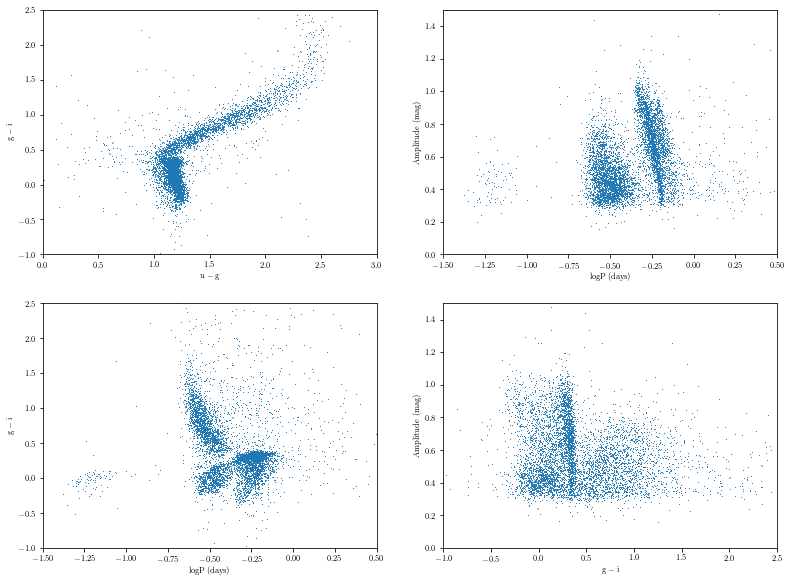

In [43]:
# set up the plot
fig = plt.figure(figsize=(12, 9), facecolor='w')
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.2, bottom=0.1, top=0.93)

# plot the color-color plot
ax1 = fig.add_subplot(221)
ax1.scatter(ug, gi, s=0.9, lw=0)
ax1.set_xlim(0.0, 3.0)
ax1.set_ylim(-1.0, 2.5)
ax1.set_xlabel(r'${\rm u-g}$', color='k')
ax1.set_ylabel(r'${\rm g-i}$', color='k')

# plot the A vs. logP plot
ax2 = fig.add_subplot(222)
ax2.scatter(logP, A, s=0.9, lw=0)
ax2.set_xlim(-1.5, 0.5)
ax2.set_ylim(0.0, 1.5)
ax2.set_xlabel(r'${\rm logP \, (days)}$', color='k')
ax2.set_ylabel(r'${\rm Amplitude \,\, (mag)}$', color='k')

# g-i vs. logP
ax3 = fig.add_subplot(223)
ax3.scatter(logP, gi, s=0.9, lw=0)
ax3.set_xlim(-1.5, 0.5)
ax3.set_ylim(-1.0, 2.5)
ax3.set_xlabel(r'${\rm logP \, (days)}$', color='k')
ax3.set_ylabel(r'${\rm g-i}$', color='k')

# A vs. g-i 
ax4 = fig.add_subplot(224)
ax4.scatter(gi, A, s=0.9, lw=0)
ax4.set_xlim(-1.0, 2.5)
ax4.set_ylim(0.0, 1.5)
ax4.set_xlabel(r'${\rm g-i}$', color='k')
ax4.set_ylabel(r'${\rm Amplitude \,\, (mag)}$', color='k')

plt.show()

And then do the PCA analysis...

In [44]:
from sklearn.decomposition import PCA
X = np.column_stack((ug, gi, logP, A))
pca = PCA(n_components=4, whiten=False)  
pca.fit(X)  # call the work horse 
comp = pca.transform(X) # compute the subspace projection of X
mean = pca.mean_ # length 4 mean of the data
components = pca.components_ # 4 x 4 matrix of components
var = pca.explained_variance_ # the length 4 array of eigenvalues
var_rat = pca.explained_variance_ratio_
# and now generate principal axes values
P1 = comp[:,0]
P2 = comp[:,1]
P3 = comp[:,2]
P4 = comp[:,3]
print(np.mean(P1), np.min(P1), np.max(P1))
print(np.mean(P2), np.min(P2), np.max(P2))
print(np.mean(P3), np.min(P3), np.max(P3))
print(np.mean(P4), np.min(P4), np.max(P4))

(-1.1653548285814855e-15, -1.12365169023579, 100.51900980622689)
(-8.508940018214021e-16, -2.151567975599691, 3.0631018145734092)
(-2.1619181839755732e-16, -1.8424086006079996, 4.116816850760959)
(-2.2197234830123533e-16, -1.3373569356113666, 1.9329680840429546)


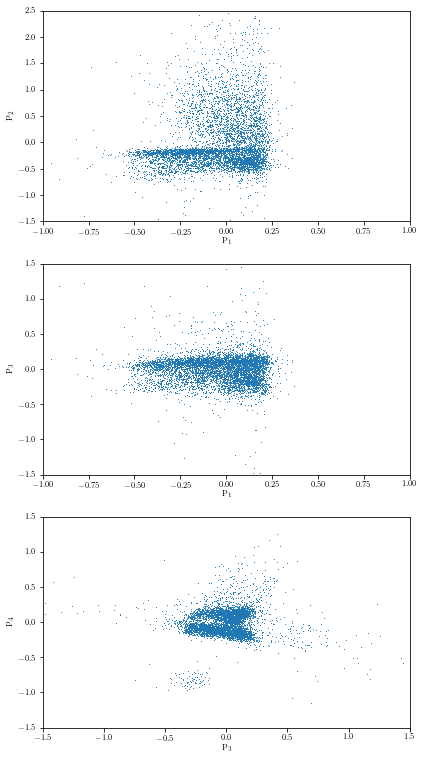

In [45]:
# set up the plot
fig = plt.figure(figsize=(6, 12), facecolor='w')
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.2, bottom=0.1, top=0.93)

# plot the P2 vs. P1 plot
ax1 = fig.add_subplot(311)
ax1.scatter(P1, P2, s=0.9, lw=0)
ax1.set_xlim(-1.0, 1.0)
ax1.set_ylim(-1.5, 2.5)
ax1.set_xlabel(r'${\rm P_1}$', color='k')
ax1.set_ylabel(r'${\rm P_2}$', color='k')

# P3 vs. P1
ax2 = fig.add_subplot(312)
ax2.scatter(P1, P3, s=0.9, lw=0)
ax2.set_xlim(-1.0, 1.0)
ax2.set_ylim(-1.5, 1.5)
ax2.set_xlabel(r'${\rm P_1}$', color='k')
ax2.set_ylabel(r'${\rm P_3}$', color='k')

# P4 vs. P3
ax2 = fig.add_subplot(313)
ax2.scatter(P3, P4, s=0.9, lw=0)
ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_xlabel(r'${\rm P_3}$', color='k')
ax2.set_ylabel(r'${\rm P_4}$', color='k')

plt.show()

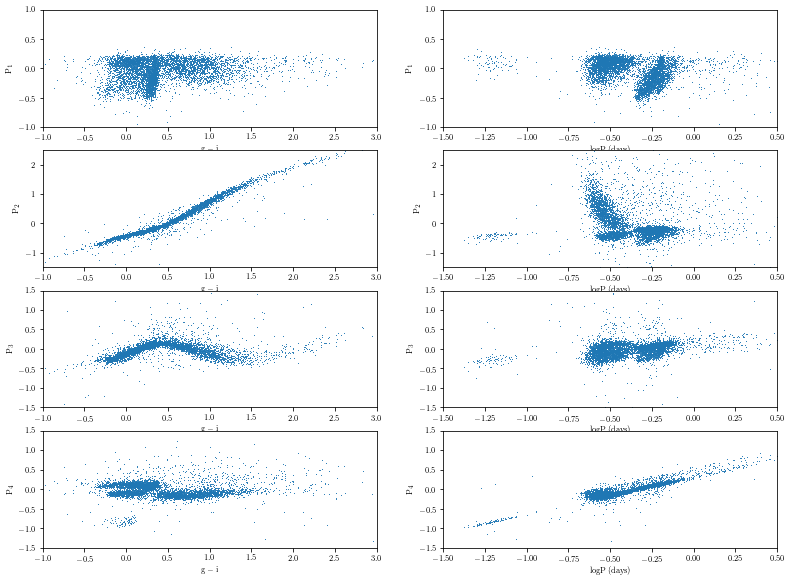

In [46]:
# set up the plot
fig = plt.figure(figsize=(12, 9), facecolor='w')
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.2, bottom=0.1, top=0.93)

#  
ax1 = fig.add_subplot(421)
ax1.scatter(gi, P1, s=0.9, lw=0)
ax1.set_xlim(-1.0, 3.0)
ax1.set_ylim(-1.0, 1.0)
ax1.set_xlabel(r'${\rm g-i}$', color='k')
ax1.set_ylabel(r'${\rm P_1}$', color='k')

#  
ax2 = fig.add_subplot(422)
ax2.scatter(logP, P1, s=0.9, lw=0)
ax2.set_xlim(-1.5, 0.5)
ax2.set_ylim(-1.0, 1.0)
ax2.set_xlabel(r'${\rm logP \, (days)}$', color='k')
ax2.set_ylabel(r'${\rm P_1}$', color='k')
 
#  
ax3 = fig.add_subplot(423)
ax3.scatter(gi, P2, s=0.9, lw=0)
ax3.set_xlim(-1.0, 3.0)
ax3.set_ylim(-1.5, 2.5)
ax3.set_xlabel(r'${\rm g-i}$', color='k')
ax3.set_ylabel(r'${\rm P_2}$', color='k')

#  
ax4 = fig.add_subplot(424)
ax4.scatter(logP, P2, s=0.9, lw=0)
ax4.set_xlim(-1.5, 0.5)
ax4.set_ylim(-1.5, 2.5)
ax4.set_xlabel(r'${\rm logP \, (days)}$', color='k')
ax4.set_ylabel(r'${\rm P_2}$', color='k')
 
#  
ax5 = fig.add_subplot(425)
ax5.scatter(gi, P3, s=0.9, lw=0)
ax5.set_xlim(-1.0, 3.0)
ax5.set_ylim(-1.5, 1.5)
ax5.set_xlabel(r'${\rm g-i}$', color='k')
ax5.set_ylabel(r'${\rm P_3}$', color='k')

#  
ax6 = fig.add_subplot(426)
ax6.scatter(logP, P3, s=0.9, lw=0)
ax6.set_xlim(-1.5, 0.5)
ax6.set_ylim(-1.5, 1.5)
ax6.set_xlabel(r'${\rm logP \, (days)}$', color='k')
ax6.set_ylabel(r'${\rm P_3}$', color='k')

#  
ax5 = fig.add_subplot(427)
ax5.scatter(gi, P4, s=0.9, lw=0)
ax5.set_xlim(-1.0, 3.0)
ax5.set_ylim(-1.5, 1.5)
ax5.set_xlabel(r'${\rm g-i}$', color='k')
ax5.set_ylabel(r'${\rm P_4}$', color='k')

#  
ax6 = fig.add_subplot(428)
ax6.scatter(logP, P4, s=0.9, lw=0)
ax6.set_xlim(-1.5, 0.5)
ax6.set_ylim(-1.5, 1.5)
ax6.set_xlabel(r'${\rm logP \, (days)}$', color='k')
ax6.set_ylabel(r'${\rm P_4}$', color='k')
 
plt.show()

## Problem 2

These age and color data for asteroid families are taken
from the paper Jedicke et al. (2004, Nature 429, 275), see fig. 1 in http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf



In [47]:
# Age is measured in 10^6 yrs (Myr)
# Log10(age) and error (of Log(Age))
logAge = np.asarray([3.398, 2.477, 3.398, 3.477, 3.301, 1.699, 2.699, 0.763,
         2.301, 3.079,  3.176, 0.398])
LageErr = np.asarray([0.087, 0.145, 0.174, 0.145, 0.109, 0.347, 0.174, 0.015,
          0.217, 0.145, 0.145, 0.434])
# SDSS principal asteroid color PC1 and its error (per family)
PC1 = np.asarray([0.620, 0.476, 0.523, 0.582, 0.460, 0.479, 0.432, 0.351, 
       0.427, 0.522, 0.532, 0.311])
PC1err = np.asarray([0.005, 0.015, 0.007, 0.011, 0.005, 0.032, 0.033, 0.047,
        0.021, 0.015, 0.022, 0.027])
# time/age on linear axes
age = 10**logAge
# and standard error propagation (although errors can be large)
ageErr = age * LageErr * np.log(10)
# set ageErr to 1000 years for all data points
# ageErr = 0.001 + 0*ageErr

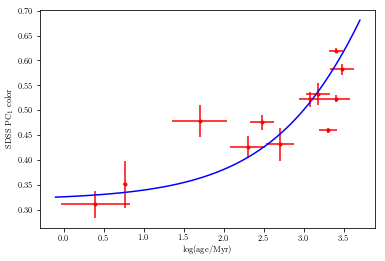

In [48]:
# let's take a quick look at the data to verify that it looks
# similar to fig. 1 from Jedicke et al. 
logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)
# the best fit from Jedicke et al. 
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
ax = plt.figure().add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, c='blue')
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', 
             marker='.', ls='None', label='Observed')
plt.show() 

In [49]:
### now let's redo doMCMCparabola from the lecture to be able to fit instead
### y = a + b*[1-exp(-(x/c)^d)]  
def doMCMCasteroids(xObs, yObs, xErr, yErr, doXerror = False, nChain = 10000, nBurn = 2000): 
    def model(xObs, yObs, xErr, yErr, doXerror): 
        a = pymc.Uniform('a', 0.3, 0.35, value= 0.31)
        b = pymc.Uniform('b', 0, 10, value= 1.0)
        c = pymc.Uniform('c', 0, 100000, value= 20000.0)
        d = pymc.Uniform('d', 0, 5, value= 1.0)

        if (doXerror):
            xLatent = pymc.Normal('x', mu=xObs, tau=(xErr)**-2)  
        else:
            xLatent = xObs 
        
        @pymc.deterministic()
        def parabola(x=xLatent, a=a, b=b, c=c, d=d):
            return a + b*(1-np.exp(-(x/c)**d))
         
        y = pymc.Normal('y', mu=parabola, tau=(yErr)**-2, value=yObs, observed=True)
        return locals()

    myModel = pymc.MCMC(model(xObs,yObs, xErr, yErr, doXerror))
    myModel.sample(nChain, nBurn, 1)
    traces = [myModel.trace(s)[:] for s in ['a', 'b', 'c', 'd']]
    M = pymc.MAP(myModel)
    M.fit()
    fit_vals = (M.a.value, M.b.value, M.c.value, M.d.value)
    return traces, fit_vals

In [50]:
import pymc as pymc
#import seaborn as sns
# run MCMC 
traces, fit_vals = doMCMCasteroids(age, PC1, ageErr, PC1err, True, 50000, 10000) 

 [-----------------100%-----------------] 50000 of 50000 complete in 12.0 sec

In [51]:
print("BASIC STATS:")
print('a:', np.mean(traces[0]), np.median(traces[0]), np.std(traces[0]))
print('b:', np.mean(traces[1]), np.median(traces[1]), np.std(traces[1]))
print('c:', np.mean(traces[2]), np.median(traces[2]), np.std(traces[2]))
print('d:', np.mean(traces[3]), np.median(traces[3]), np.std(traces[3]))
print(fit_vals)

BASIC STATS:
('a:', 0.3289608815657822, 0.3305814943725257, 0.014190109259207977)
('b:', 1.1473801361917342, 1.1010123156104805, 0.3288444647564662)
('c:', 53750.01053793553, 53741.004354432946, 27477.751499563263)
('d:', 0.44382701421829496, 0.43869193109067356, 0.07289749003547856)
(array(0.31533738), array(0.95218993), array(43573.53101593), array(0.36011687))


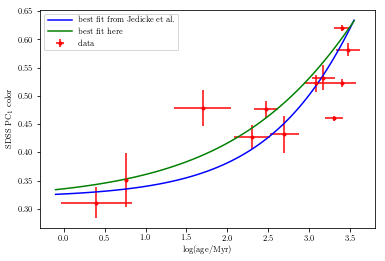

In [52]:
# let's take a quick look at the data 
logT = np.linspace(-0.1, 3.55, 100)
time = np.power(10,logT)
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
aFit = fit_vals[0]
bFit = fit_vals[1] 
cFit = fit_vals[2] 
dFit = fit_vals[3] 
colorFit = aFit + bFit*(1-np.exp(-(time/cFit)**dFit))

ax = plt.figure().add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, c='blue', label='best fit from Jedicke et al.')
ax.plot(logT,colorFit, c='green', label='best fit here')
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', 
             marker='.', ls='None', label='data')
plt.legend()
plt.show() 

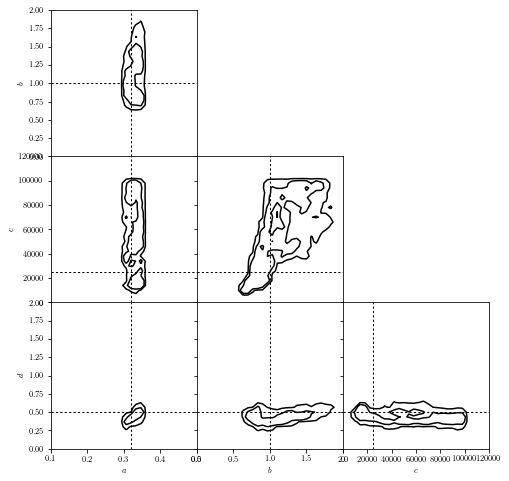

Best-fit values here (abcd):
(array(0.31533738), array(0.95218993), array(43573.53101593), array(0.36011687))


In [53]:
###  look at the posterior pdf p(b,m) from MCMC 
# a helper routine for more informative plots
from astroML.plotting.mcmc import plot_mcmc

labels = ['$a$', '$b$', '$c$', '$d$']
limits = [(0.1, 0.5), (0, 2.0), (0,120000), (0, 2.0)]
jedicke = [0.32, 1.0, 25000, 0.5]

fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.1, right=0.95,
                    hspace=0.05, wspace=0.05)

# This function plots multiple panels with the traces
plot_mcmc(traces, labels=labels, limits=limits, true_values=jedicke, fig=fig,
          bins=30, colors='k')

plt.show()

print('Best-fit values here (abcd):')
print(aFit, bFit, cFit, dFit)

In [54]:
ageErr2 = 0.001 + 0*ageErr
traces2, fit_vals2 = doMCMCasteroids(age, PC1, ageErr2, PC1err, True, 50000, 10000) 

 [-----------------100%-----------------] 50000 of 50000 complete in 11.7 sec

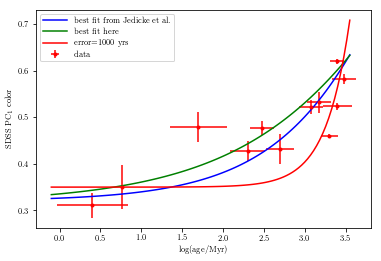

In [55]:
# let's take a quick look at the data 
aFit2 = fit_vals2[0]
bFit2 = fit_vals2[1] 
cFit2 = fit_vals2[2] 
dFit2 = fit_vals2[3] 
colorFit2 = aFit2 + bFit2*(1-np.exp(-(time/cFit2)**dFit2))

ax = plt.figure().add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, c='blue', label='best fit from Jedicke et al.')
ax.plot(logT,colorFit, c='green', label='best fit here')
ax.plot(logT,colorFit2, c='red', label='error=1000 yrs')
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', 
             marker='.', ls='None', label='data')
plt.legend()
plt.show() 